# Python入門 〜pandasでデータ分析編〜

## Pandasとは  
<img src="https://github.com/pandas-dev/pandas/raw/master/doc/logo/pandas_logo.png">
もともと統計解析用のR言語で使われていた**data.frame**という表（テーブル)みたいな  
データ形式をPythonに移植したモジュール（ライブラリ）  
**jupyter**と組み合わせるとテーブルの中身を見ながら処理できるので最強  
  
内部的には**NumPy**というベクトルや行列といった数値計算用のモジュール  
（リストより効率のいい配列みたいな奴）をデータ分析用の機能でラップしたもの

ただしあんまりにもでかいデータ（数GBオーダー）は苦手  
代替として**Dask**や次世代数値計算ライブラリ**Blaze**を参照

## Kaggleとは
<img src="https://www.kaggle.com/static/images/site-logo.png">  
データ分析の世界的なコンペティションを行うWebサービス  
ユーザーはお題に沿って最も性能の良いモデルを構築することを目的とする  
賞金が出るお題もある  

今回はKaggleのチュートリアルに沿うことでデータ分析入門を目指す

## データ分析のプロセス
<img src="https://speakerd.s3.amazonaws.com/presentations/5c63dce1d2494dfc9f068fe1c58eab41/slide_6.jpg">  

[死にゆくアンチウイルスへの祈り](https://speakerdeck.com/ntddk/si-niyukuantiuirusuhefalseqi-ri) より

データ分析は一筋縄では行かないので何段階かに分けて考える  
プログラミングでの大雑把な手順は
1. データの加工
1. 予測モデルの作成・学習
1. 予測モデルの評価  

の3段階で考えるのはどうでしょう（？）

### 1. データの加工

#### データのロード  
今回の対象となるデータは，1912年4月15日に沈没したタイタニック号の乗員乗客名簿．  
女性，子供，1等船室の人々が生存確率が高かったことが知られている．  
Dead or Aliveをデータからより正確に予測することはできるか？  
いわゆる二値分類問題．  

※[A free interactive Machine Learning tutorial in Python](https://www.datacamp.com/courses/kaggle-python-tutorial-on-machine-learning)にインタラクティブなチュートリアルがあります

In [1]:
import pandas as pd

In [2]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train_df = pd.read_csv(train_url)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


891人分のデータ（タイタニック号に乗っていた2224人のうちの40%）があるようだが，  
欠損値のある要素（Ageなど）もある
- PassengerID:　乗客ID
- Survived:　　　生存結果 (1: 生存, 0: 死亡)　
- Pclass:　　　　客室の等級
- Name:　　　　乗客の名前
- Sex:　　　　　性別
- Age:　　　　　年齢
- SibSp:　　　　兄弟，配偶者の数
- Parch:　　　　両親，子供の数
- Ticket:　　　　チケット番号
- Fare:　　　　　乗船料金
- Cabin:　　　　部屋番号
- Embarked:　　　乗船した港　Cherbourg，Queenstown，Southamptonの３種類

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


行（row）が乗客一人ひとりを表し，列（column）が乗客の性質を表す  
「NaN」と書かれているデータは「データ無し（欠損値）」を表す  
891人分のデータが訓練データとして与えられている 

#### 量的データ

In [4]:
# train_df.describe()
# train_df.describe(percentiles=[.61, .62])
# train_df.describe(percentiles=[.75, .8])
# train_df.describe(percentiles=[.68, .69])
train_df.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
10%,90.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.550000
20%,179.000000,0.000000,1.000000,19.000000,0.000000,0.000000,7.854200
30%,268.000000,0.000000,2.000000,22.000000,0.000000,0.000000,8.050000
40%,357.000000,0.000000,2.000000,25.000000,0.000000,0.000000,10.500000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
60%,535.000000,0.000000,3.000000,31.800000,0.000000,0.000000,21.679200


describe()で簡単な統計量（基本・要約・記述統計量）を一覧できる
- 891人中生き残った人のデータは38%ほど
- 親や子供と共に乗っていない人が75%くらい
- 兄弟や配偶者と共に乗っていない人が70%くらい
- \$512も払っている人は1%未満
- 65歳以上の人も1%未満

#### 可視化
パーセンタイルを折れ線グラフで見てみる  
  
**matplotlib**はPythonの作図ライブラリで最も有名  
**seaborn**はmatplotlibの見た目をナウくする  
% matplotlib inline というマジックコマンドで，グラフをセル内に表示できる  
% matplotlib notebook ならインタラクティブな表示が可能

可視化のツールは他にもたくさんある．  
それぞれ長所短所を見分けて使い分けよう．  
[Pythonの可視化パッケージの使い分け](http://qiita.com/alchemist/items/544d45480ce9c1ca2c16)  
[Pythonの可視化ツールはHoloViewsが標準になるかもしれない](http://qiita.com/driller/items/53be86cea3c3201e7e0f)  
[Google製可視化OSSのFacetsがめっちゃ便利だから使ってみてくれ](http://qiita.com/inoue0426/items/071c127428112f498421)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [6]:
train_df.quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0.1,90.0,0.0,1.0,14.0,0.0,0.0,7.5500
0.2,179.0,0.0,1.0,19.0,0.0,0.0,7.8542
0.3,268.0,0.0,2.0,22.0,0.0,0.0,8.0500
0.4,357.0,0.0,2.0,25.0,0.0,0.0,10.5000
0.5,446.0,0.0,3.0,28.0,0.0,0.0,14.4542
0.6,535.0,0.0,3.0,31.8,0.0,0.0,21.6792
0.7,624.0,1.0,3.0,36.0,1.0,0.0,27.0000
0.8,713.0,1.0,3.0,41.0,1.0,1.0,39.6875
0.9,802.0,1.0,3.0,50.0,1.0,2.0,77.9583


In [7]:
import numpy as np
np.arange(0, 1, .1)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

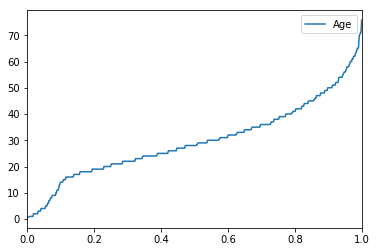

In [8]:
train_df.quantile(np.arange(0, 1, .001)).plot(y="Age")

#### 質的データ

In [9]:
train_df.describe(include=[np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Laitinen, Miss. Kristina Sofia",male,CA. 2343,G6,S
freq,1,577,7,4,644


- Nameは一意
- 65%が男性
- 客室には複数の人が泊まっていたり，一人が複数の客室を使用していたりする
- 乗船した港は3種類だがほとんどがS
- Ticketは22%も重複している

---

#### データ観察からの仮説
参考：https://www.kaggle.com/startupsci/titanic-data-science-solutions

相関  
　どの指標が生死と相関があるのかを知り，モデルのたたき台にする 
  
補完  
1. 生死と相関のある年齢は補完したい
1. Embarkedも補完したいかもしれない
  
修正
1. 22%も重複しているTicketは分析には不適ではないか
1. Cabinは欠損値が多すぎるのでつかえない
1. PassengerIdはただの番号
1. 名前は生死に無関係では
  
作成
1. ParchとSibSpを使えば家族数が割り出せるのでは  
1. 名前から敬称を取り出せる
1. 年齢の連続値より年齢層として扱う方がいいかもしれない
1. 料金も同様に
  
分類
1. 女性は生き残る可能性が高いか
1. 子供は生き残る可能性が高いか
1. 上位クラスの乗客は生き残る可能性が高いか


#### 相関を見る  
※ Pandasのデータ操作はさまざま．  
[Pandasを使ったデータ操作の基本](http://cocodrips.hateblo.jp/entry/2017/07/30/185430)などを参考に，適宜「（やりたいこと） pandas」で検索．  
バージョン違いでAPIが変わる可能性があるので，なるべく新しい記事を参考にしよう．

In [10]:
train_df[["Sex"]]

,Sex
0,male
1,female
2,female
3,female
4,male
5,male
6,male
7,male
8,female
9,female


In [11]:
train_df["Sex"]

0        male
1      female
2      female
3      female
4        male
5        male
6        male
7        male
8      female
9      female
10     female
11     female
12       male
13       male
14     female
15     female
16       male
17       male
18     female
19     female
20       male
21       male
22     female
23       male
24     female
25     female
26       male
27       male
28     female
29       male
        ...  
861      male
862    female
863    female
864      male
865    female
866    female
867      male
868      male
869      male
870      male
871    female
872      male
873      male
874    female
875    female
876      male
877      male
878      male
879    female
880    female
881      male
882    female
883      male
884      male
885    female
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [12]:
train_df["Sex"][train_df["Sex"] == "male"]

0      male
4      male
5      male
6      male
7      male
12     male
13     male
16     male
17     male
20     male
21     male
23     male
26     male
27     male
29     male
30     male
33     male
34     male
35     male
36     male
37     male
42     male
45     male
46     male
48     male
50     male
51     male
54     male
55     male
57     male
       ... 
840    male
841    male
843    male
844    male
845    male
846    male
847    male
848    male
850    male
851    male
857    male
859    male
860    male
861    male
864    male
867    male
868    male
869    male
870    male
872    male
873    male
876    male
877    male
878    male
881    male
883    male
884    male
886    male
889    male
890    male
Name: Sex, Length: 577, dtype: object

In [13]:
train_df.loc[train_df["Sex"] == "male", "Sex"]

0      male
4      male
5      male
6      male
7      male
12     male
13     male
16     male
17     male
20     male
21     male
23     male
26     male
27     male
29     male
30     male
33     male
34     male
35     male
36     male
37     male
42     male
45     male
46     male
48     male
50     male
51     male
54     male
55     male
57     male
       ... 
840    male
841    male
843    male
844    male
845    male
846    male
847    male
848    male
850    male
851    male
857    male
859    male
860    male
861    male
864    male
867    male
868    male
869    male
870    male
872    male
873    male
876    male
877    male
878    male
881    male
883    male
884    male
886    male
889    male
890    male
Name: Sex, Length: 577, dtype: object

相関を見るために質的変数を量的変数に変えておく

In [14]:
train_df_select = train_df.copy()
train_df_select.loc[train_df_select["Sex"] == "male", "Sex"] = 0
train_df_select.loc[train_df_select["Sex"] == "female", "Sex"] = 1
train_df_select = train_df_select.astype({"Sex": int})
train_df_select[["Sex"]]

,Sex
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


In [15]:
train_df_select.loc[train_df_select["Embarked"] == "S", "Embarked"] = 0
train_df_select.loc[train_df_select["Embarked"] == "C", "Embarked"] = 1
train_df_select.loc[train_df_select["Embarked"] == "Q", "Embarked"] = 2
train_df_select = train_df_select.dropna(subset=["Embarked"])
train_df_select = train_df_select.astype({"Embarked": int})
train_df_select[["Embarked"]]

,Embarked
0,0
1,1
2,0
3,0
4,0
5,2
6,0
7,0
8,0
9,1


In [16]:
train_df_select_drop = train_df_select.dropna()
train_df_select_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
PassengerId    183 non-null int64
Survived       183 non-null int64
Pclass         183 non-null int64
Name           183 non-null object
Sex            183 non-null int64
Age            183 non-null float64
SibSp          183 non-null int64
Parch          183 non-null int64
Ticket         183 non-null object
Fare           183 non-null float64
Cabin          183 non-null object
Embarked       183 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 18.6+ KB


In [17]:
train_df_select_drop.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,0.148495,-0.089136,0.025205,0.030933,-0.083488,-0.051454,0.029740,-0.054246
Survived,0.148495,1.000000,-0.034542,0.532418,-0.254085,0.106346,0.023582,0.134241,0.083231
Pclass,-0.089136,-0.034542,1.000000,0.046181,-0.306514,-0.103592,0.047496,-0.315235,-0.235027
Sex,0.025205,0.532418,0.046181,1.000000,-0.184969,0.104291,0.089581,0.130433,0.060862
Age,0.030933,-0.254085,-0.306514,-0.184969,1.000000,-0.156162,-0.271271,-0.092424,0.088112
SibSp,-0.083488,0.106346,-0.103592,0.104291,-0.156162,1.000000,0.255346,0.286433,0.015962
Parch,-0.051454,0.023582,0.047496,0.089581,-0.271271,0.255346,1.000000,0.389740,-0.097495
Fare,0.029740,0.134241,-0.315235,0.130433,-0.092424,0.286433,0.389740,1.000000,0.233452
Embarked,-0.054246,0.083231,-0.235027,0.060862,0.088112,0.015962,-0.097495,0.233452,1.000000


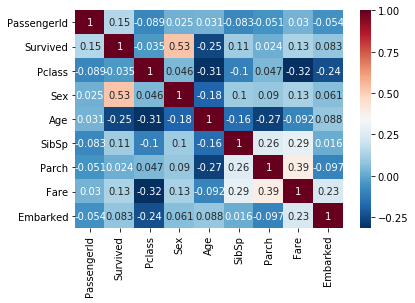

In [18]:
sns.heatmap(train_df_select_drop.corr(), annot=True, cmap='RdBu_r')

Sex > Age > Fare > SibSp > Embarked > Pclass > Parch の順に相関が高い  
ただし，EmbarkedとPclassは名義尺度なので注意  
https://mathwords.net/syakudo  
<table　align="left">
<tbody><tr align="center">
<td>尺度</td>
<td>例</td>
<td>大小比較</td>
<td>差</td>
<td>比</td>
</tr>
<tr align="center">
<td>名義尺度</td>
<td>電話番号</td>
<td>×</td>
<td>×</td>
<td>×</td>
</tr>
<tr align="center">
<td>順序尺度</td>
<td>震度</td>
<td>○</td>
<td>×</td>
<td>×</td>
</tr>
<tr align="center">
<td>間隔尺度</td>
<td>温度（℃）</td>
<td>○</td>
<td>○</td>
<td>×</td>
</tr>
<tr align="center">
<td>比率尺度</td>
<td>長さ</td>
<td>○</td>
<td>○</td>
<td>○</td>
</tr>
</tbody></table>

#### 分布を見る

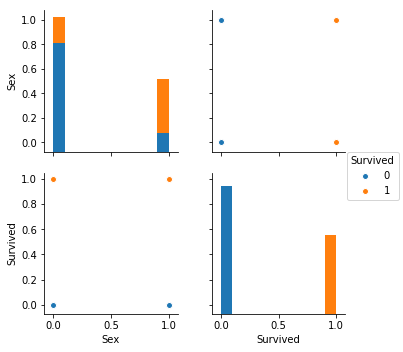

In [19]:
sns.pairplot(train_df_select[["Sex", 'Survived']], hue='Survived')

Femaleのほうが生存率が高い

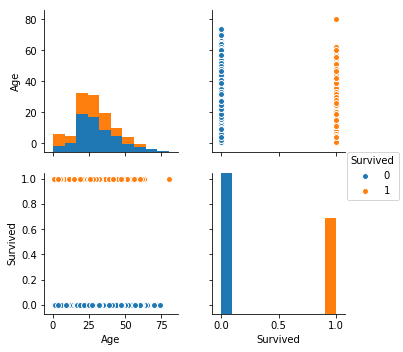

In [20]:
sns.pairplot(train_df_select[["Age", 'Survived']].dropna(), hue='Survived')

お年寄りはだいたい亡くなっている  
幼児の生存率は高い

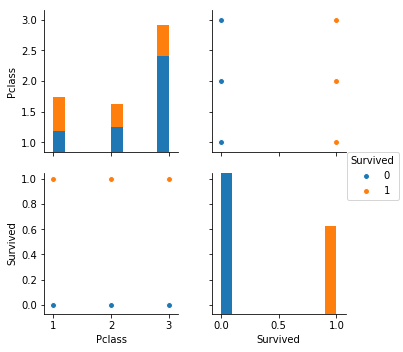

In [21]:
sns.pairplot(train_df_select[["Pclass", 'Survived']], hue='Survived')

1>2>3等の順で生存率が高い

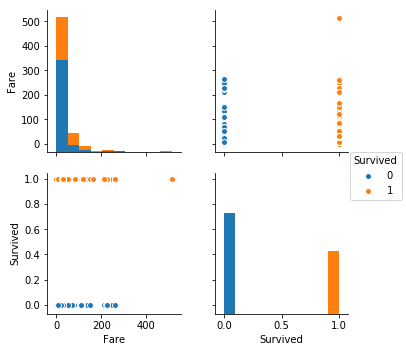

In [22]:
sns.pairplot(train_df_select[["Fare", 'Survived']], hue='Survived')

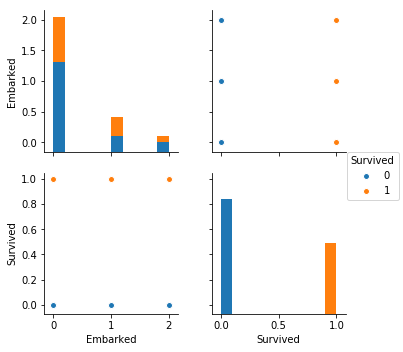

In [23]:
sns.pairplot(train_df_select[["Embarked", 'Survived']], hue='Survived')

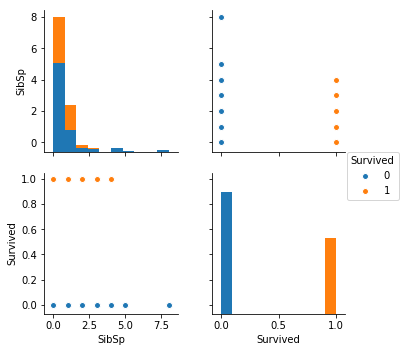

In [24]:
sns.pairplot(train_df_select[["SibSp", 'Survived']], hue='Survived')

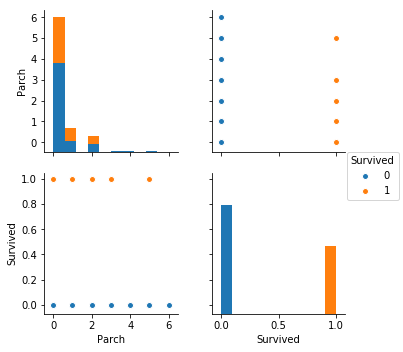

In [25]:
sns.pairplot(train_df_select[["Parch", 'Survived']], hue='Survived')

---

### 2.予測モデルの作成・学習

In [26]:
train_df = pd.read_csv("http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv")
test_df = pd.read_csv("http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv")
train_df.shape, test_df.shape

((891, 12), (418, 11))

#### データの整理

Pclass, Sex, Age, Fareのみで予測することにする  
名義尺度はダミー変数化すべし  

In [27]:
all_df = pd.concat([train_df.drop('Survived', axis=1), test_df], axis=0)
all_df = pd.get_dummies(all_df[["Pclass", "Sex", "Age", "Fare"]])
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 5 columns):
Pclass        1309 non-null int64
Age           1046 non-null float64
Fare          1308 non-null float64
Sex_female    1309 non-null uint8
Sex_male      1309 non-null uint8
dtypes: float64(2), int64(1), uint8(2)
memory usage: 43.5 KB


欠損値の傾向を確認する

In [28]:
missing = all_df.copy()
missing = missing.isnull()
missing.groupby(missing.columns.tolist()).size()

Pclass  Age    Fare   Sex_female  Sex_male
False   False  False  False       False       1045
               True   False       False          1
        True   False  False       False        263
dtype: int64

欠損値をどうにかする（捨てる，置き換える，補う）方法はいろいろある    
今回は単純に中央値を当てはめてみることにする．
   
http://sinhrks.hatenablog.com/entry/2016/02/01/080859#欠損値  
リストワイズ法　欠損レコードを除去  
ペアワイズ法　相関係数など2変数を用いて計算を行う際に、  
　　　　　　　対象の変数が欠損している場合に計算対象から除外  
平均代入法　　欠損を持つ変数の平均値を補完  
回帰代入法　　欠損を持つ変数の値を回帰式をもとに補完  
確率的回帰代入法，完全情報最尤推定法，多重代入法などなど

In [29]:
all_df = all_df.fillna(all_df.median())
all_df

,Pclass,Age,Fare,Sex_female,Sex_male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1
5,3,28.0,8.4583,0,1
6,1,54.0,51.8625,0,1
7,3,2.0,21.0750,0,1
8,3,27.0,11.1333,1,0
9,2,14.0,30.0708,1,0


In [30]:
train, test = all_df[:train_df.shape[0]], all_df[train_df.shape[0]:]
train.shape, test.shape

((891, 5), (418, 5))

In [31]:
t_train = train_df["Survived"].values
x_train = train.values
x_test = test.values

#### scikit-learn
<img src="http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" />
Pythonで最もメンテナンスされている機械学習ライブラリ．  
わかりやすいAPIと豊富な機能が売り．  

<img src="http://scikit-learn.org/stable/_static/ml_map.png" />  
膨大な手法があるので，このチートシートを頼りにどれを使うかの参考にするといい．  
この図に載っているのはごく一部だけれど．

#### 決定木で予測

In [32]:
import sklearn.tree
clf_decision_tree = sklearn.tree.DecisionTreeClassifier(max_depth=2, random_state=0)

In [33]:
clf_decision_tree.fit(x_train, t_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [34]:
y_train = clf_decision_tree.predict(x_train)
y_train

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0,

accuracy（正解数÷データ数）はライブラリを使うまでもないですが

In [35]:
sum(t_train == y_train) / len(t_train)

0.79573512906846244

In [36]:
sklearn.metrics.accuracy_score(t_train, y_train)

0.79573512906846244

長いimportはこれで短縮（名前空間を汚染するので諸刃の剣）  

In [37]:
from sklearn.metrics import accuracy_score

クラス数が多い分類はconfusion matrixを見ると傾向がつかみやすい

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(t_train, y_train)

array([[532,  17],
       [165, 177]])

横軸が正解，縦軸が予測値．  
（左上）個が正しく死亡と判定，（左下）個が誤って死亡と判定  
（右上）個が誤って生存と判定，（右下）個が正しく生存と判定

In [39]:
from sklearn.metrics import classification_report
print(classification_report(t_train, y_train))

             precision    recall  f1-score   support

          0       0.76      0.97      0.85       549
          1       0.91      0.52      0.66       342

avg / total       0.82      0.80      0.78       891



#### 決定木の可視化  
graphvizを別途インストールしていないと動きません^^;  

In [40]:
import pydotplus
from sklearn.externals.six import StringIO
dot_data = StringIO()
sklearn.tree.export_graphviz(clf_decision_tree, out_file=dot_data
                     , feature_names=train.columns, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# PDFファイルに出力
# graph.write_pdf("graph.pdf")

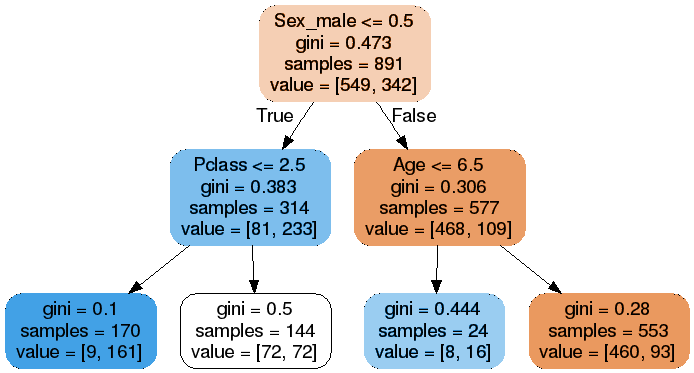

In [41]:
from IPython.display import Image
Image(graph.create_png())

#### Random Forestで予測
Random Forestは欠損値に強い，次元数の多さに強い  
木が十分な数なら過学習しない（？）  
OOBエラーによる評価なのでCross Varidation要らず（？）

In [42]:
from sklearn.ensemble import RandomForestClassifier
# n_estimatorは木の数  
clf_random_forest = RandomForestClassifier(n_estimators=100, random_state=0)

In [43]:
clf_random_forest.fit(x_train, t_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [44]:
y_train = clf_random_forest.predict(x_train)
print(accuracy_score(t_train, y_train))

0.977553310887


In [45]:
print(classification_report(t_train, y_train))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98       549
          1       0.98      0.96      0.97       342

avg / total       0.98      0.98      0.98       891



In [46]:
print(confusion_matrix(t_train, y_train))

[[541   8]
 [ 12 330]]


### 3.予測モデルの評価
何をもってよいモデルだとするかは問題設定による  
accuracy？precision？recall？f1-score？  
PR曲線のAUC？ROC曲線のAUC？

#### モデルを良くする  
- もっといいパラメータがあるのでは？  
パラメータをいろいろ試す必要がある．→ Grid Search
  
  
- 他のデータでもうまく行く保証はあるのか？  
過学習（overfitting）  を防ぎたい＝汎化性能を高める．→ Cross Varidation  

<img src="https://image.slidesharecdn.com/random-150204215702-conversion-gate01/95/-54-1024.jpg" />
[機械学習によるデータ分析まわりのお話](https://www.slideshare.net/canard0328/ss-44288984) より  
  
両方skit-learnでできます！

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
tuned_parameters = [
    {'C': [1, 1e1, 1e2, 1e3, 1e4], 
     'kernel': ['rbf'], 
     'gamma': [1e-2, 1e-3, 1e-4]},
]
clf_SVC_cv = GridSearchCV(
    SVC(random_state=0),
    tuned_parameters,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

In [48]:
clf_SVC_cv.fit(x_train, t_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [1, 10.0, 100.0, 1000.0, 10000.0], 'kernel': ['rbf'], 'gamma': [0.01, 0.001, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [49]:
clf_SVC_cv.grid_scores_

/home/araki/.linuxbrew/var/pyenv/versions/3.6.2/envs/py3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.50043, std: 0.08626, params: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'},
 mean: 0.47828, std: 0.08318, params: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'},
 mean: 0.37328, std: 0.09909, params: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'},
 mean: 0.68011, std: 0.03106, params: {'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'},
 mean: 0.69682, std: 0.03389, params: {'C': 10.0, 'gamma': 0.001, 'kernel': 'rbf'},
 mean: 0.44273, std: 0.07083, params: {'C': 10.0, 'gamma': 0.0001, 'kernel': 'rbf'},
 mean: 0.68510, std: 0.03305, params: {'C': 100.0, 'gamma': 0.01, 'kernel': 'rbf'},
 mean: 0.71063, std: 0.03691, params: {'C': 100.0, 'gamma': 0.001, 'kernel': 'rbf'},
 mean: 0.70447, std: 0.04291, params: {'C': 100.0, 'gamma': 0.0001, 'kernel': 'rbf'},
 mean: 0.66976, std: 0.02572, params: {'C': 1000.0, 'gamma': 0.01, 'kernel': 'rbf'},
 mean: 0.71563, std: 0.03581, params: {'C': 1000.0, 'gamma': 0.001, 'kernel': 'rbf'},
 mean: 0.71271, std: 0.03689, params: {'C': 1000.0, 'gamma': 0.0001, 'kernel': 

In [50]:
clf_SVC_cv.best_params_

{'C': 10000.0, 'gamma': 0.0001, 'kernel': 'rbf'}

In [51]:
clf_SVC_cv.best_score_

0.72497257558382566

In [52]:
y_train = clf_SVC_cv.predict(x_train)
print(classification_report(t_train, y_train))

             precision    recall  f1-score   support

          0       0.84      0.87      0.85       549
          1       0.77      0.73      0.75       342

avg / total       0.81      0.82      0.81       891



In [53]:
print(accuracy_score(t_train, y_train))

0.81593714927


In [54]:
print(confusion_matrix(t_train, y_train))

[[476  73]
 [ 91 251]]


#### Kaggleへテストの結果を提出  
問題分を読んで回答に合う形式で提出

In [55]:
y_test = clf_SVC_cv.predict(x_test)

In [56]:
result_df = pd.DataFrame({
    "PassengerId": test.index,
    "Survived": y_test
})
result_df

,PassengerId,Survived
0,0,0
1,1,1
2,2,0
3,3,0
4,4,1
5,5,0
6,6,1
7,7,0
8,8,1
9,9,0


In [57]:
result_df.to_csv('predict_result.csv', index=False)

In [58]:
!cat predict_result.csv

PassengerId,Survived
0,0
1,1
2,0
3,0
4,1
5,0
6,1
7,0
8,1
9,0
10,0
11,0
12,1
13,0
14,1
15,1
16,0
17,0
18,1
19,1
20,0
21,0
22,1
23,0
24,1
25,0
26,1
27,0
28,0
29,0
30,0
31,0
32,1
33,1
34,0
35,0
36,1
37,1
38,0
39,0
40,0
41,0
42,0
43,1
44,1
45,0
46,0
47,0
48,1
49,1
50,0
51,0
52,1
53,1
54,0
55,0
56,0
57,0
58,0
59,1
60,0
61,0
62,0
63,1
64,0
65,1
66,1
67,0
68,0
69,1
70,1
71,0
72,1
73,0
74,1
75,0
76,0
77,1
78,0
79,1
80,0
81,0
82,0
83,0
84,0
85,0
86,1
87,1
88,1
89,1
90,1
91,0
92,1
93,0
94,0
95,0
96,1
97,0
98,1
99,0
100,1
101,0
102,0
103,0
104,1
105,0
106,0
107,0
108,0
109,0
110,0
111,1
112,1
113,1
114,1
115,0
116,0
117,1
118,0
119,1
120,1
121,0
122,1
123,0
124,0
125,1
126,0
127,1
128,0
129,0
130,0
131,0
132,1
133,0
134,0
135,0
136,0
137,0
138,1
139,0
140,0
141,1
142,0
143,0
144,0
145,0
146,0
147,0
148,0
149,0
150,1
151,0
152,0
153,1
154,0
155,0
156,1
157,1
158,0
159,1
160,1
161,0
162,1
163,0
164,0
165,1
166,0
167,0
168,1
169,1
170,0
171,0
172,0
173,0
174,0
175,1
176,1
177,0
178,1
179,1
180,0
181